## Importing Libraries 

In [8]:
import pandas as pd 
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
file=pd.read_csv('SampleSuperstore.csv')

file.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Analysing the Dataset Provided

In [12]:
print(f'dimension of dataset:{file.shape} ')

dimension of dataset:(9994, 13) 


In [14]:
print(f'column names:{file.columns}')

column names:Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [15]:
print(f'Schema of the Dataset: {file.info()} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
Schema of the Dataset: None 


In [17]:
print(f'Descriptive Analysis of data : {file.describe()} ')

Descriptive Analysis of data :         Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000 


In [19]:
print(f' Number of duplicate values : {file.duplicated().sum()}')

 Number of duplicate values : 17


## Exploratory Data Analysis

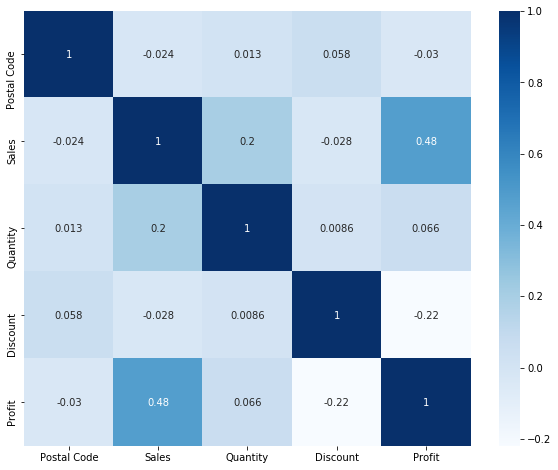

In [22]:
plt.figure(figsize=(10,8))
correlation = file.corr()
sns.heatmap(correlation,annot=True,cmap='Blues')

<Figure size 432x288 with 0 Axes>

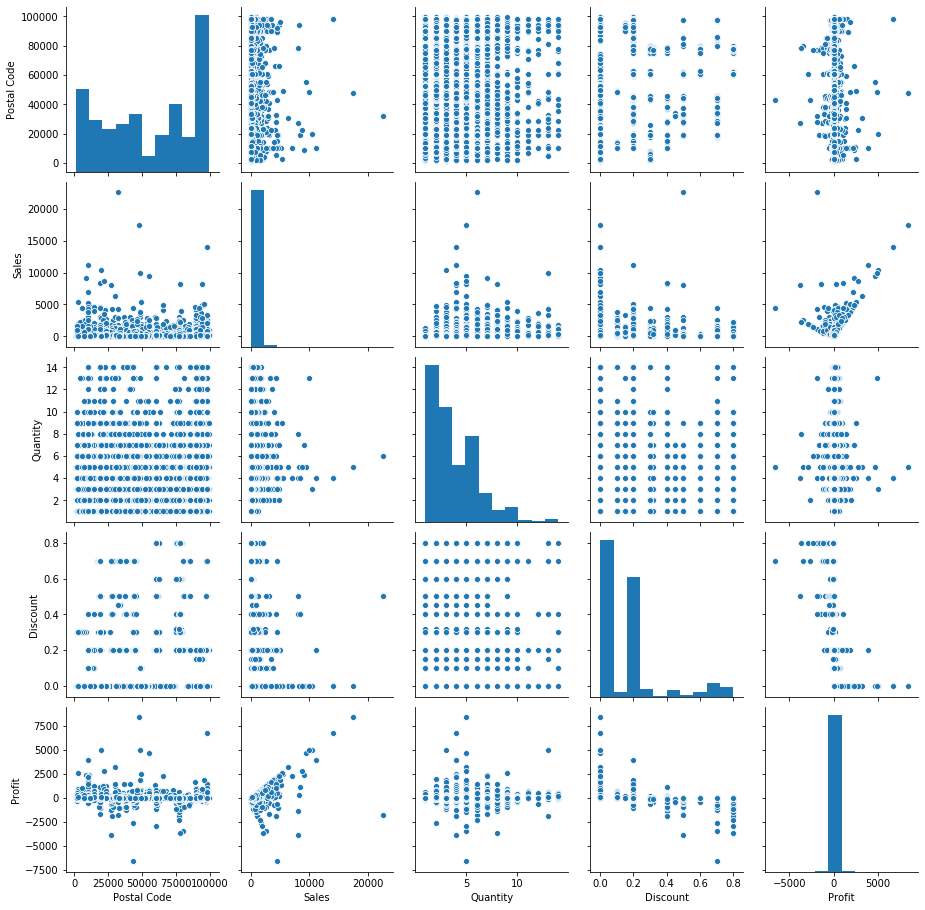

In [23]:
plt.figure()
sns.pairplot(file)

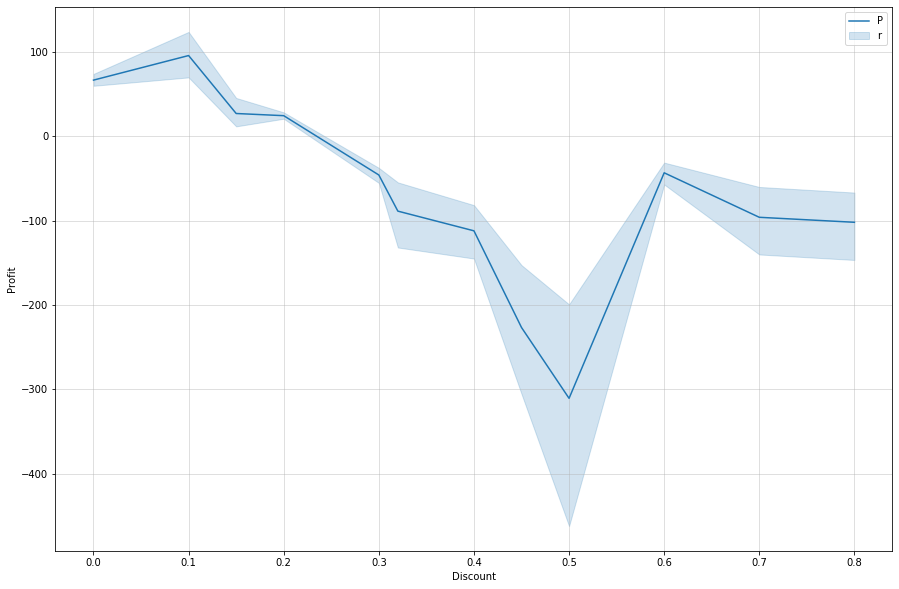

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Discount',y='Profit',data=file)
plt.legend('Profit')
plt.grid(alpha=0.5)

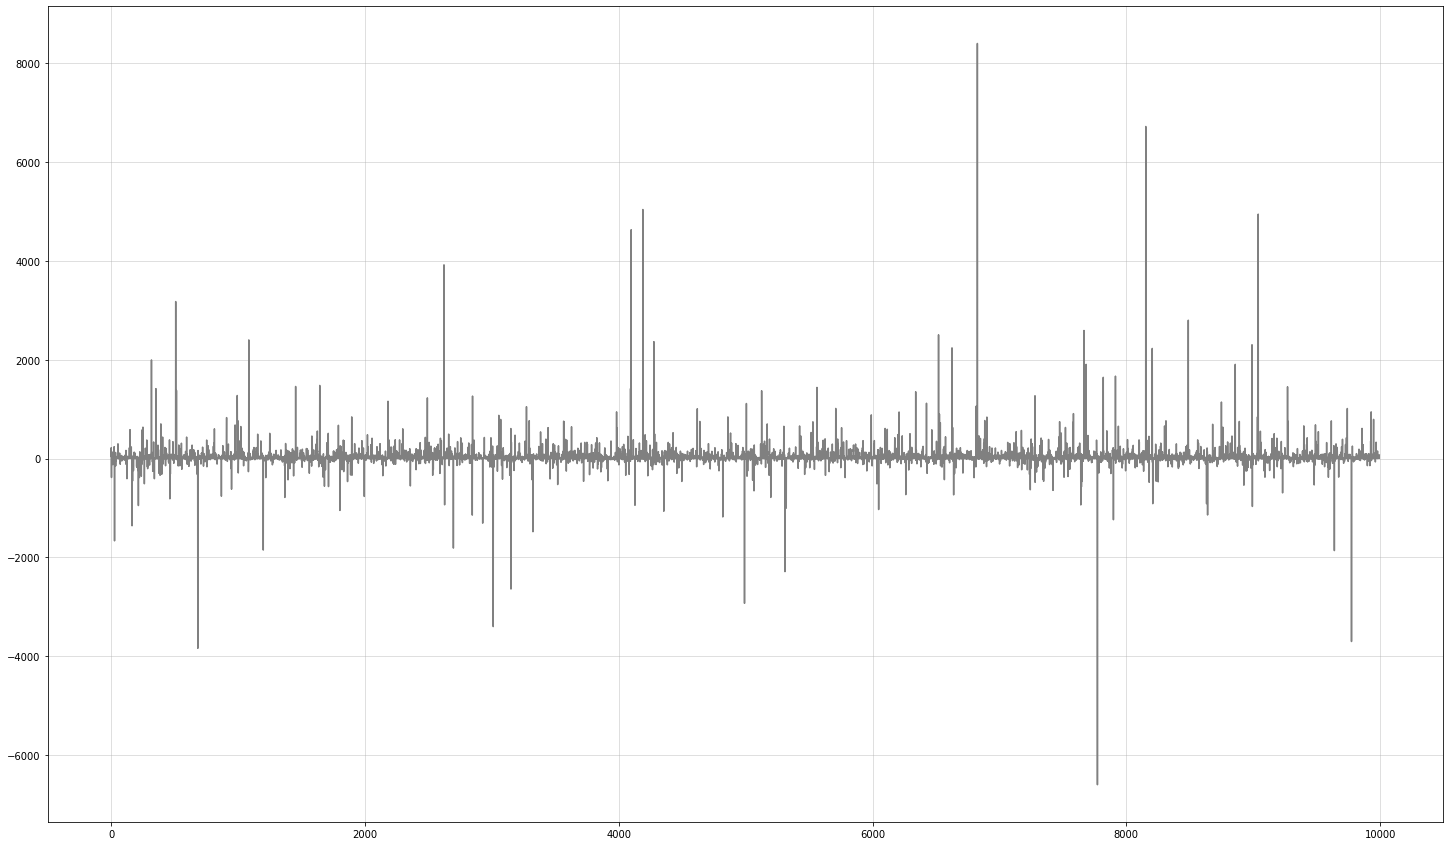

In [32]:
plt.figure(figsize=(25,15))
plt.plot(file['Profit'],color='grey')
plt.grid(alpha=0.5)

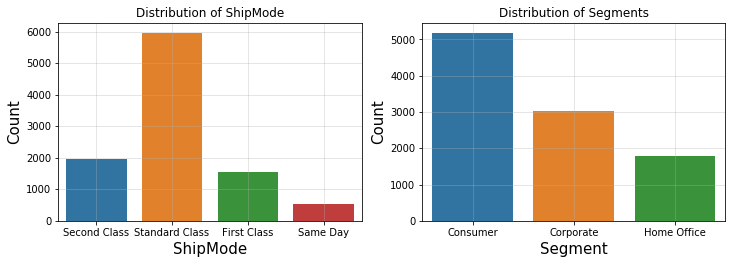

In [36]:
%matplotlib inline
plt.figure(figsize=(25,8))
plt.subplot(2,4,2)
sns.countplot('Segment',data=file)
plt.title('Distribution of Segments')
plt.xlabel('Segment',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid(alpha=0.4)
plt.subplot(2,4,1)
sns.countplot('Ship Mode', data=file)
plt.title('Distribution of ShipMode')
plt.xlabel('ShipMode',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid(alpha=0.4)
plt.show()


## Distribution Based on States

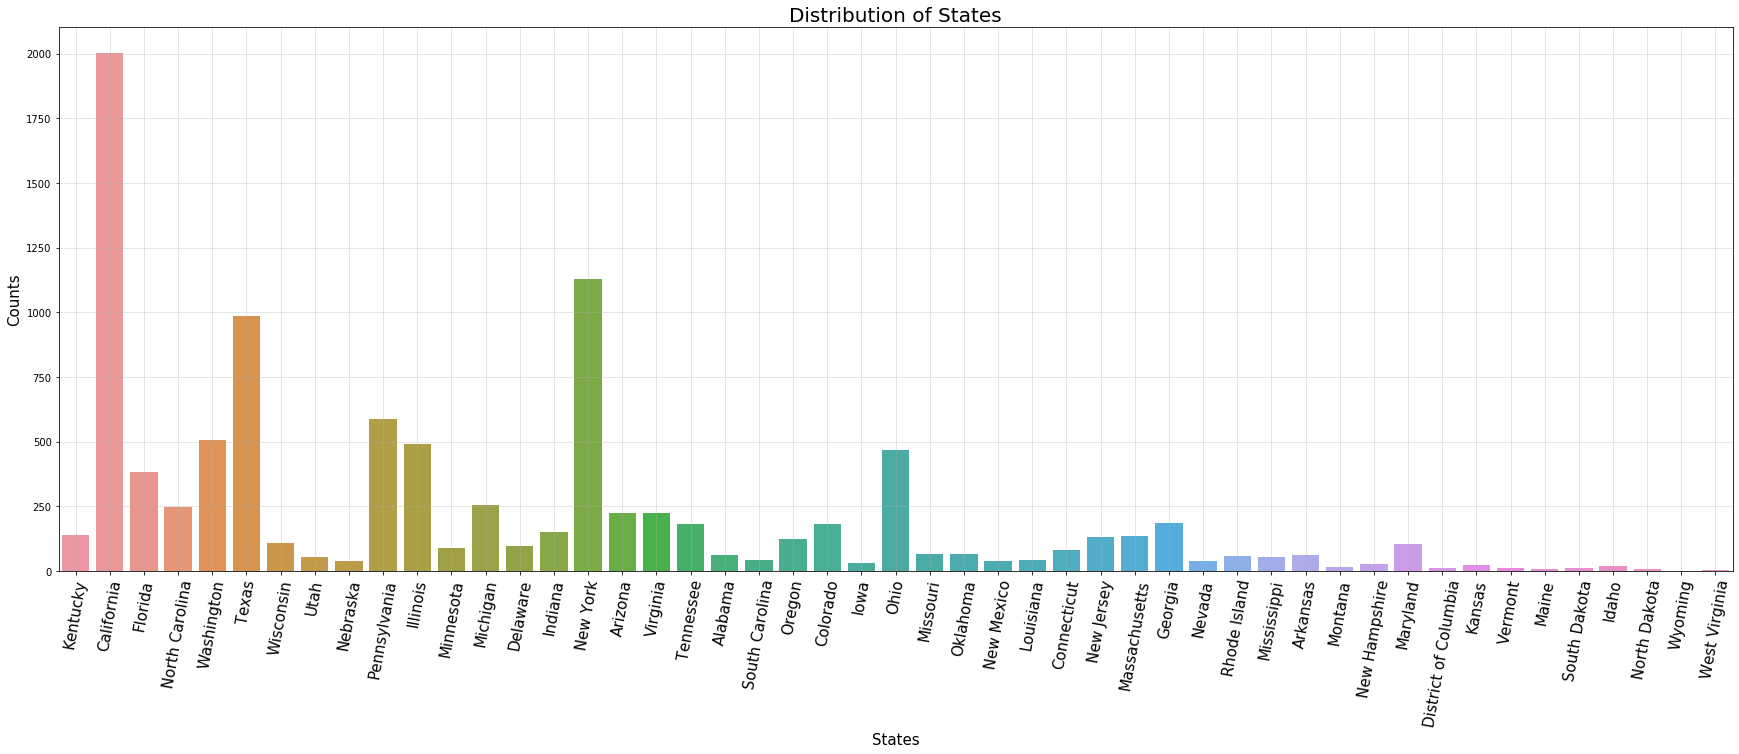

In [38]:
plt.figure(figsize=(30,10))
sns.countplot(file['State'])
plt.xticks(fontsize=15,rotation=80)
plt.xlabel('States',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title('Distribution of States',fontsize=20)
plt.grid(alpha=0.4)
plt.show()

## Distribution based on Region & Category

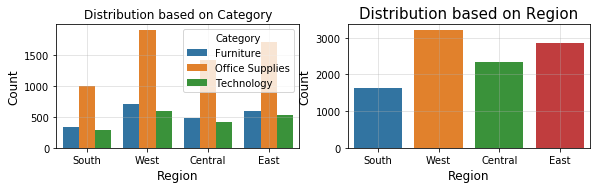

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(2,4,2)
sns.countplot('Region',data=file)
plt.title('Distribution based on Region',fontsize=15)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.grid(alpha=0.4)
plt.subplot(2,4,1)
sns.countplot('Region',hue='Category',data=file)
plt.title('Distribution based on Category')
plt.xlabel('Region',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.grid(alpha=0.4)
plt.show()

## Distribution Based on Category & Sub-Category 

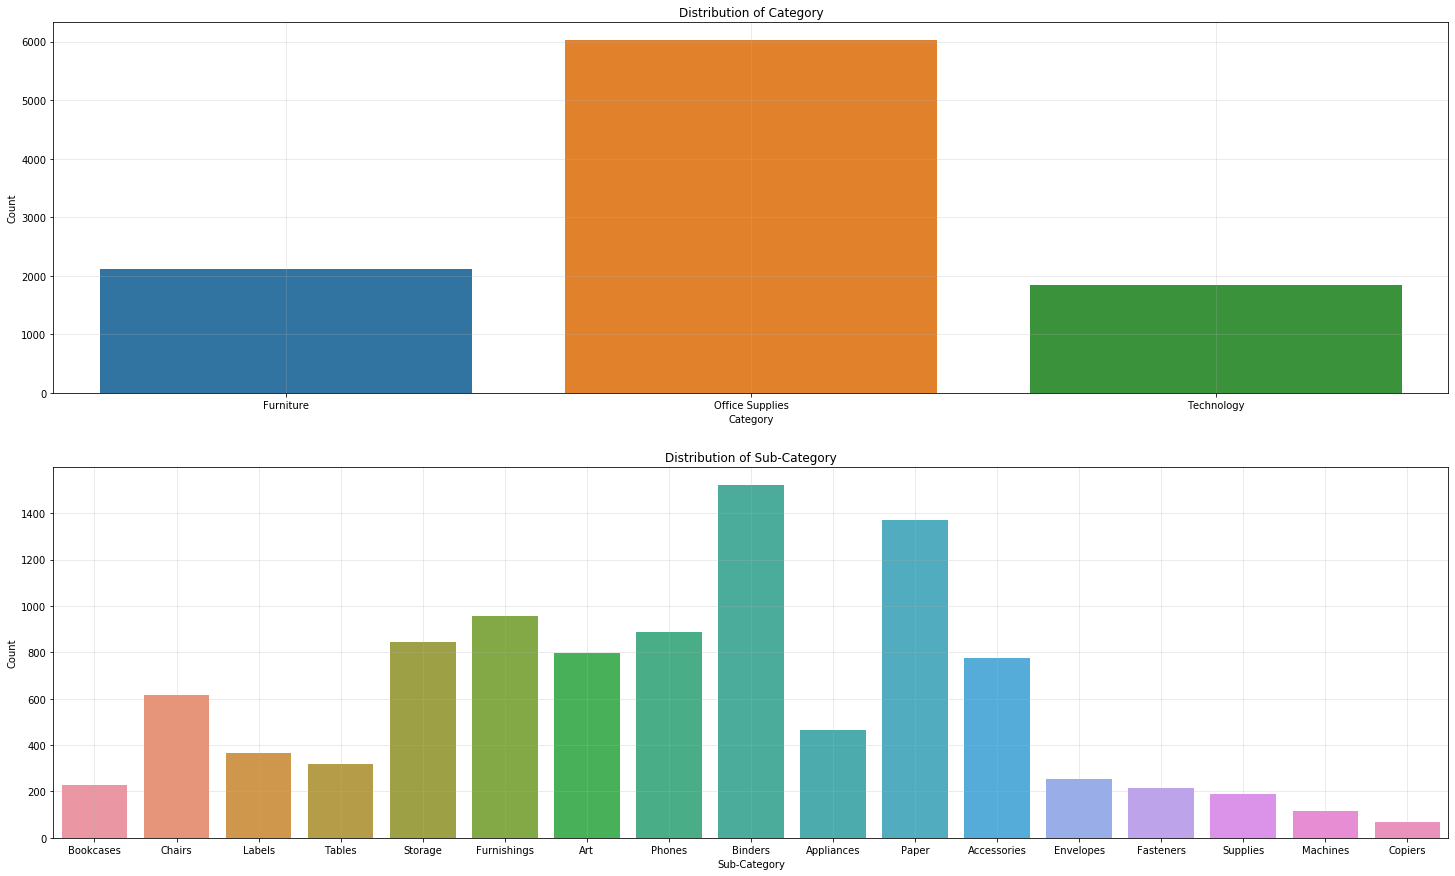

In [44]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
sns.countplot('Category',data=file)
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.subplot(2,1,2)
sns.countplot('Sub-Category',data=file)
plt.title('Distribution of Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

## Profits 

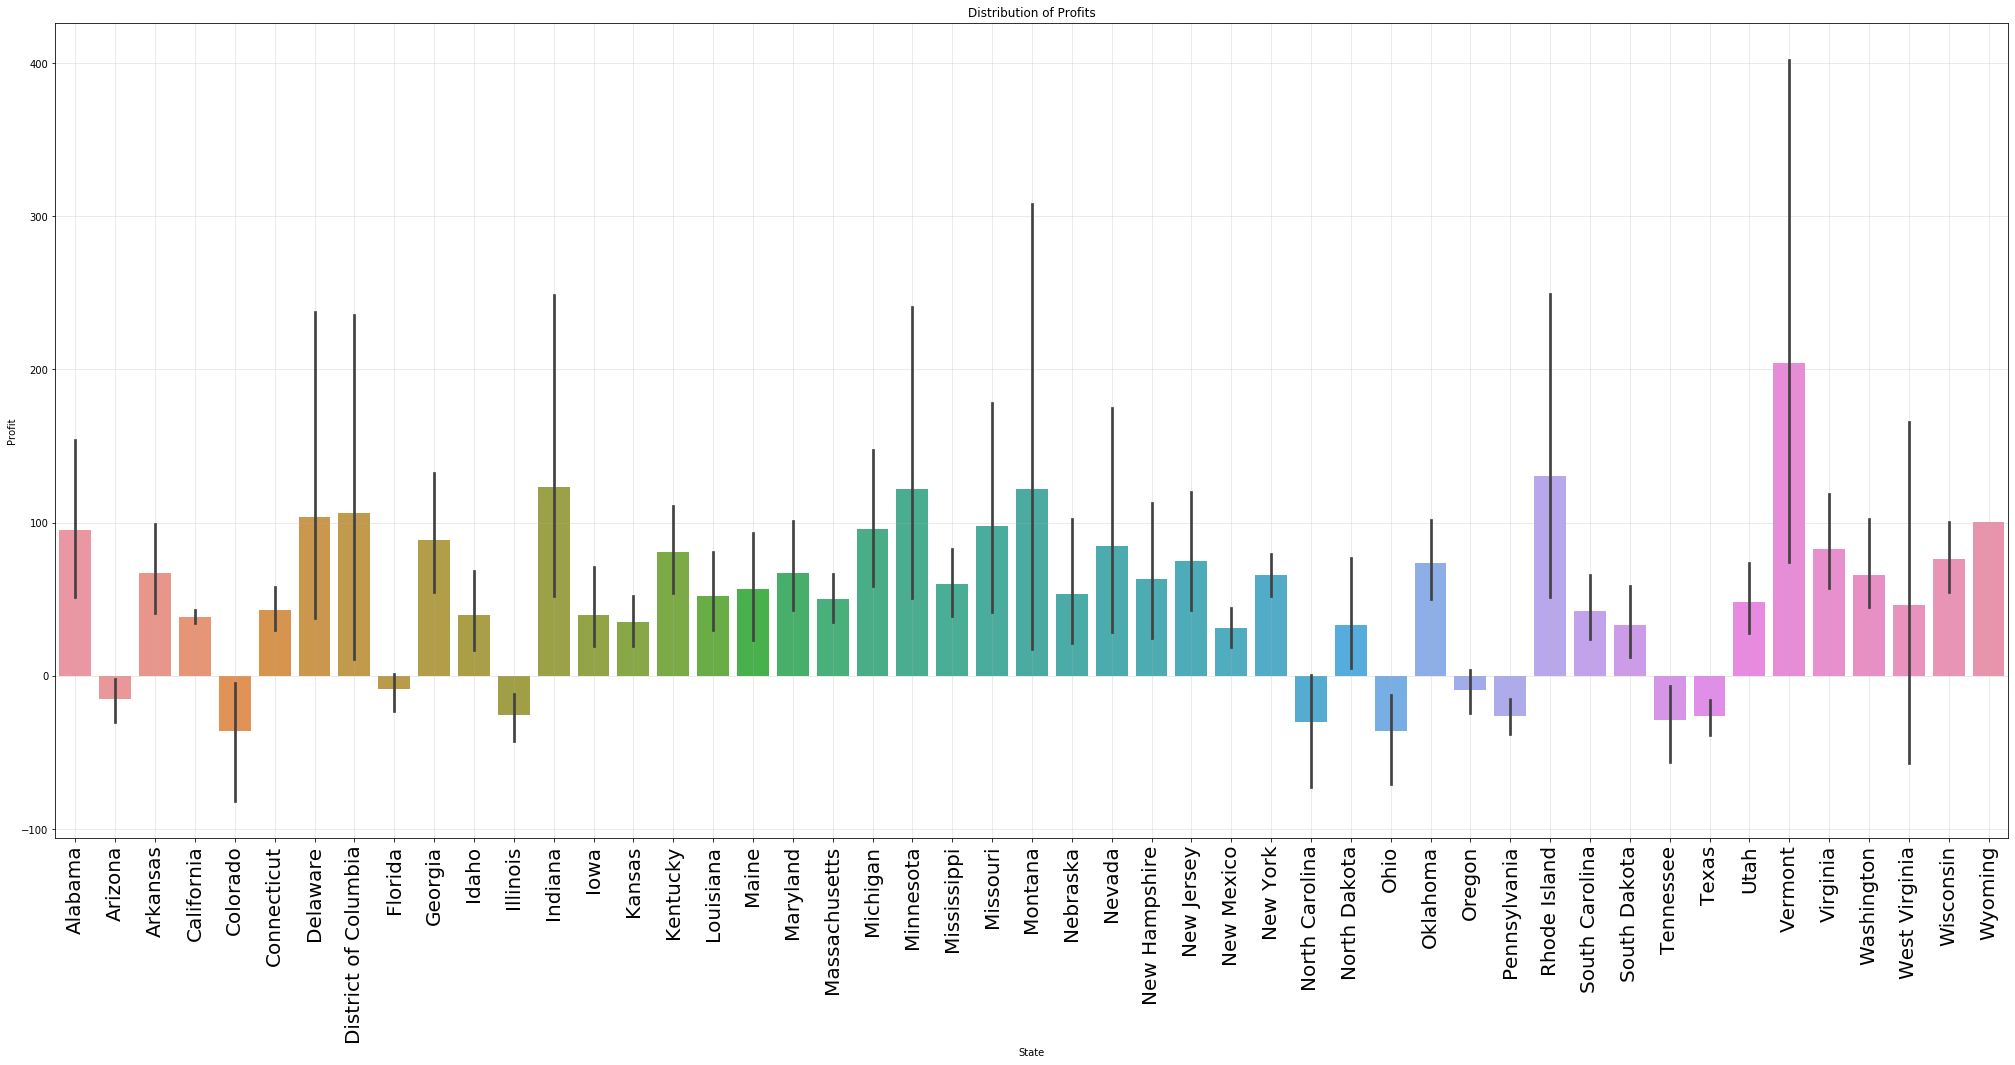

In [45]:
plt.figure(figsize=(35,15))
sns.barplot(x=file['State'].sort_values(ascending=True),y=file['Profit'])
plt.title('Distribution of Profits')
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.show()

## Profit Distribution Among Different Regions 

In [49]:
C=file[file['Region']=='Central']
E=file[file['Region']=='East']
W=file[file['Region']=='West']
S=file[file['Region']=='South']

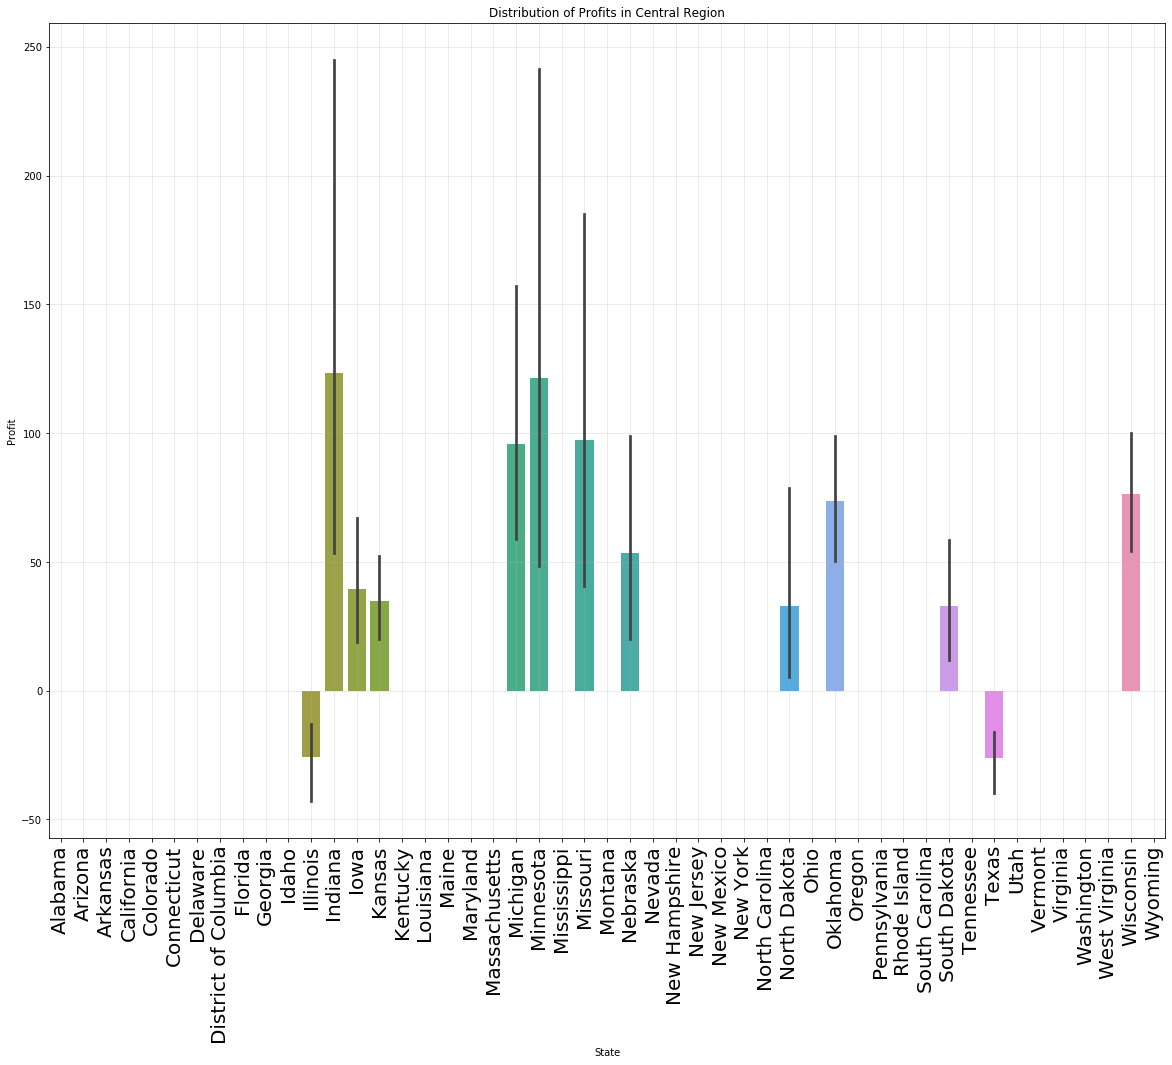

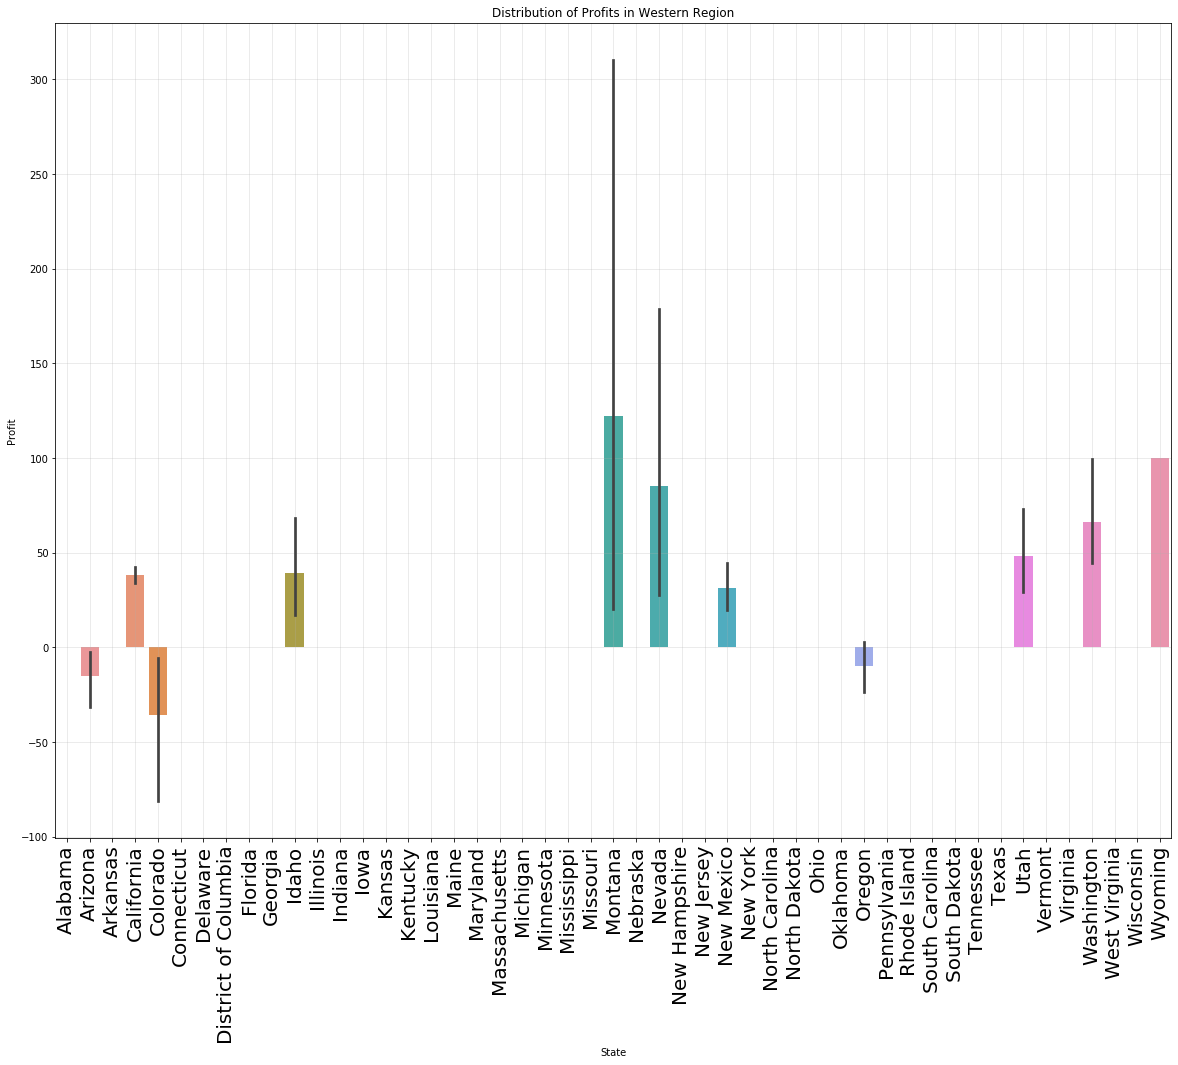

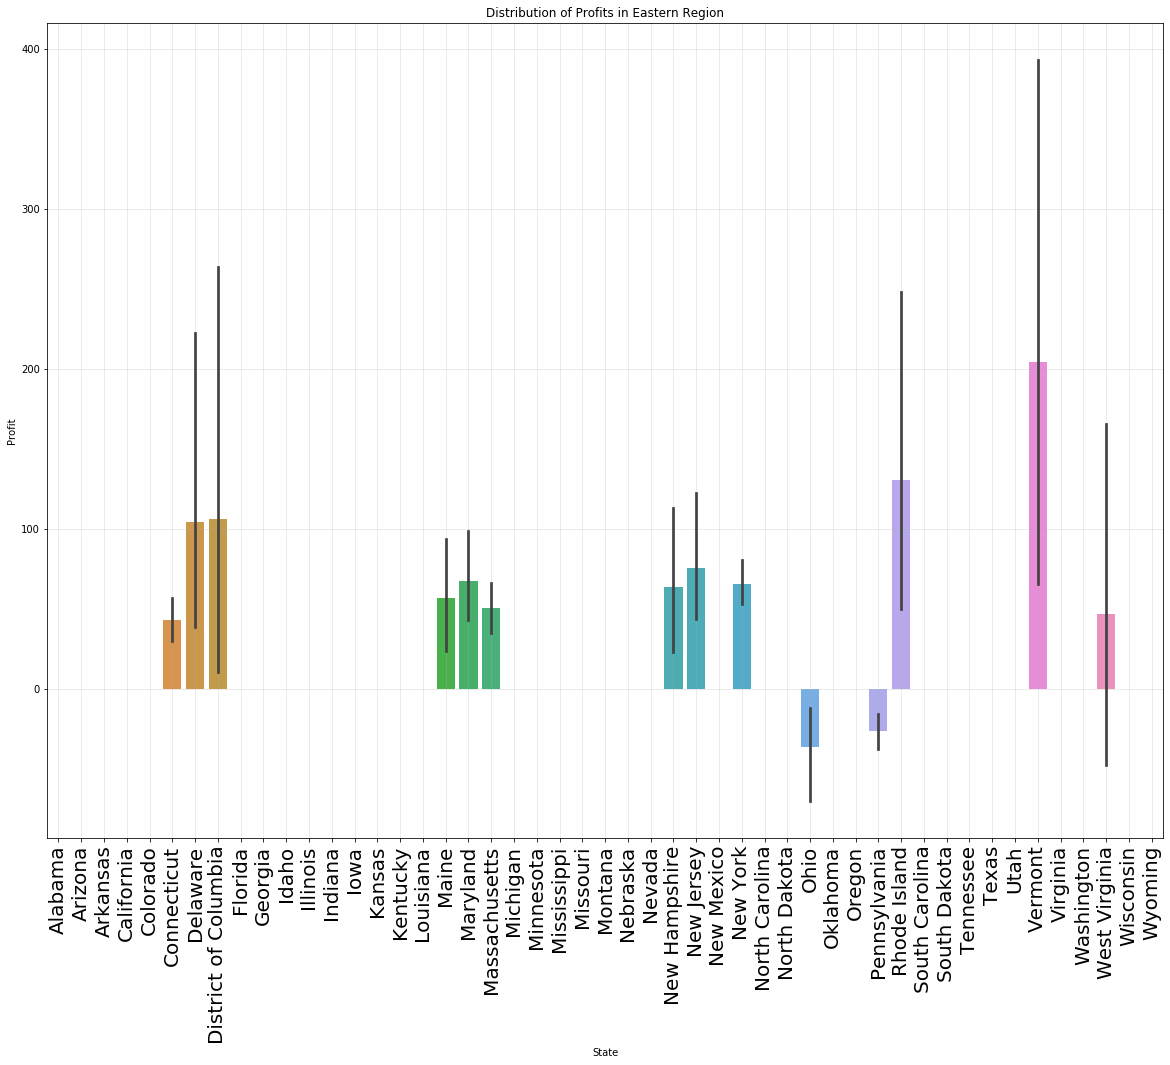

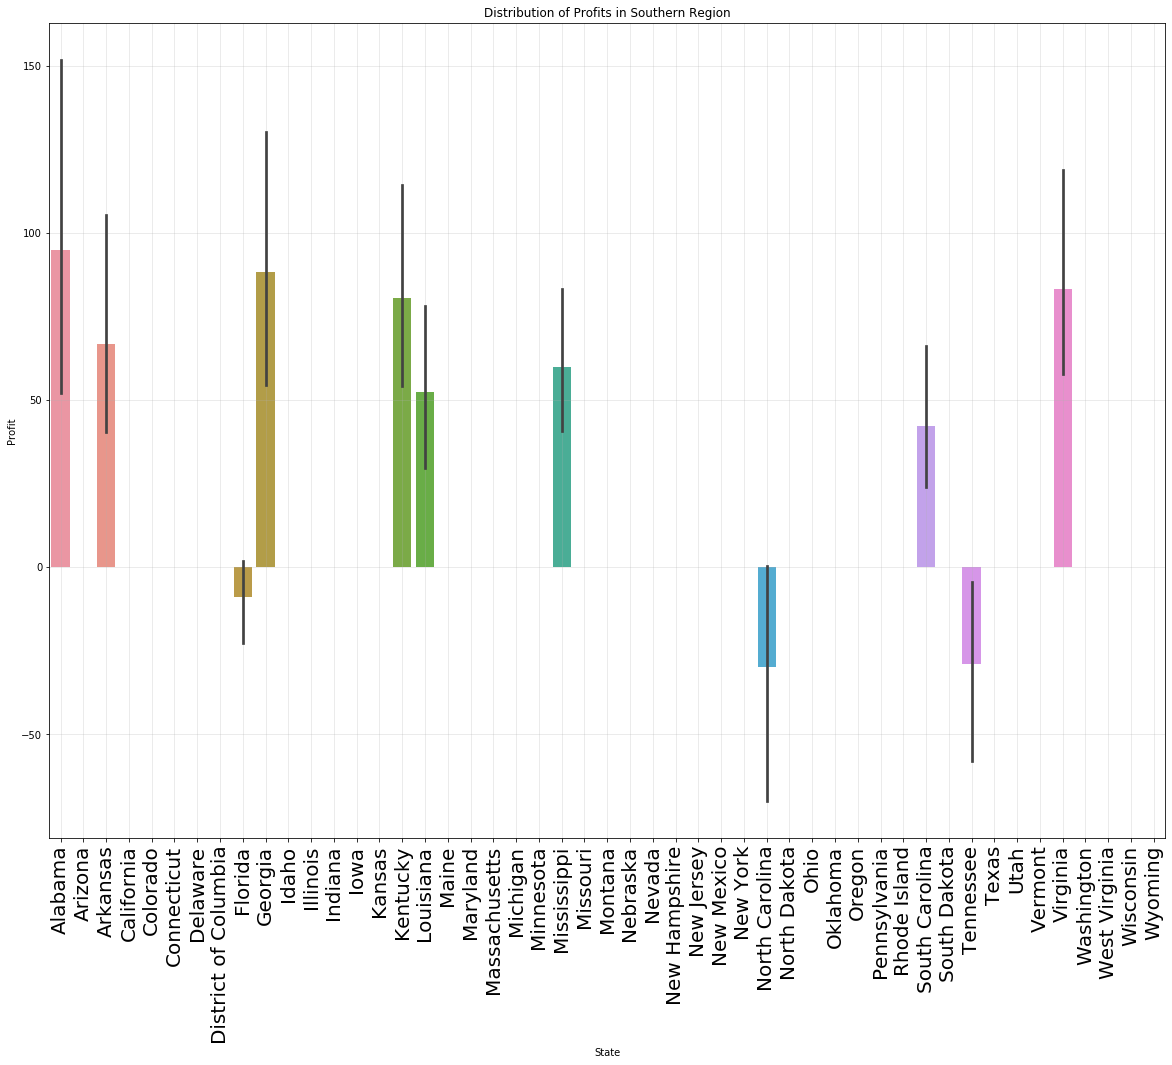

In [51]:
plt.figure(figsize=(20,15))
sns.barplot(x=file['State'].sort_values(ascending=True),y=C['Profit'])
plt.title('Distribution of Profits in Central Region')
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.figure(figsize=(20,15))
sns.barplot(x=file['State'].sort_values(ascending=True),y=W['Profit'])
plt.title('Distribution of Profits in Western Region')
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.figure(figsize=(20,15))
sns.barplot(x=file['State'].sort_values(ascending=True),y=E['Profit'])
plt.title('Distribution of Profits in Eastern Region')
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.figure(figsize=(20,15))
sns.barplot(x=file['State'].sort_values(ascending=True),y=S['Profit'])
plt.title('Distribution of Profits in Southern Region')
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.show()